In [ ]:
from keras.applications.resnet import ResNet50

In [ ]:
from keras.datasets import cifar10
import numpy as np

# Load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print(f"There are {X_train.shape[0]} train images and {X_test.shape[0]} test images")
print(f"There are {np.unique(y_train).shape[0]} unique classes to predict")

There are 50000 train images and 10000 test images
There are 10 unique classes to predict


In [ ]:
# One-hot encoding the labels
num_classes = 10
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

Shape of each image in the training data: (32, 32, 3)


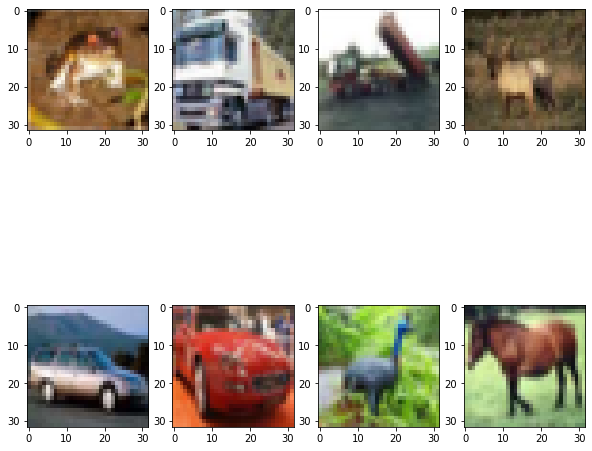

In [ ]:
import matplotlib.pyplot as plt
# Visualize the data
fig = plt.figure(figsize=(10,10))

for i in range(1, 9):
  img = X_train[i-1]
  fig.add_subplot(2, 4, i)
  plt.imshow(img)

print("Shape of each image in the training data:" , X_train.shape[1:])

In [ ]:
# Importing the necessary libraries
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
from keras.layers import Dense, Conv2D, MaxPooling2D 
from keras.models import Sequential

# Building up a Sequential Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', 
          input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0

In [ ]:
# Using adam for optimizer and binary_crossentropy for loss function
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
X_train_scratch = X_train/255
X_test_scratch = X_test/255

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
# Creating checkpoint
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5',
                               verbose=1, save_best_only=True)

In [ ]:
# Fitting the model on the train data and labels
model.fit(X_train, y_train, batch_size=32, epochs=10,
          verbose=1, callbacks=[checkpointer], validation_split=0.2,
          shuffle=True)

Epoch 1/10
1250/1250 [==============================] - 48s 37ms/step - loss: 0.2969 - accuracy: 0.3246 - val_loss: 0.2533 - val_accuracy: 0.4237

Epoch 00001: val_loss improved from inf to 0.25329, saving model to scratchmodel.best.hdf5
Epoch 2/10
1250/1250 [==============================] - 48s 39ms/step - loss: 0.2353 - accuracy: 0.4668 - val_loss: 0.2299 - val_accuracy: 0.4852

Epoch 00002: val_loss improved from 0.25329 to 0.22990, saving model to scratchmodel.best.hdf5
Epoch 3/10
1250/1250 [==============================] - 48s 38ms/step - loss: 0.2167 - accuracy: 0.5251 - val_loss: 0.2183 - val_accuracy: 0.5323

Epoch 00003: val_loss improved from 0.22990 to 0.21827, saving model to scratchmodel.best.hdf5
Epoch 4/10
1250/1250 [==============================] - 46s 37ms/step - loss: 0.2032 - accuracy: 0.5640 - val_loss: 0.2031 - val_accuracy: 0.5731

Epoch 00004: val_loss improved from 0.21827 to 0.20312, saving model to scratchmodel.best.hdf5
Epoch 5/10
1250/1250 [==============

In [ ]:
# Evaluate the model on the test data
score = model.evaluate(X_test, y_test)

# Accuracy on test data 
print("Accuracy on the test images: ", score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.1875 - accuracy: 0.6206
Accuracy on the test images:  0.6205999851226807


## Transfer Learning ResNet50

In [ ]:
# Using ResNet50 model
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input

# Loading the ResNet50 model with pre-trained ImageNet weights
model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
from skimage.transform import resize

In [ ]:
# Reshaping the training data
X_train_new = np.array([resize(X_train[i], (200, 200, 3)) for i in range(0, len(X_train))]).astype('float32')

# Preprocessing the data, so that it can be fed to the pre-trained ResNet50 model
resnet_train_input = preprocess_input(X_train_new)

# Creating bottleneck features for the training data
train_features = model.predict(resnet_train_input)

# Saving the bottlenect features
np.savez('resnet_features_train', features=train_features)

## Need Bigger Computation Device

In [ ]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

NameError: ignored

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train_features, y_train, batch_size=32, epochs=10,
          validation_split=0.2, callbacks=[checkpointer], verbose=1,
          shuffle=True)

In [ ]:
# Evaluating the model on the test data
score = model.evaluate(test_features, y_test)

# Accuracy on test data
print("Accuracy on the test images: ", score[1])

NameError: ignored